In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

In [3]:
train = pd.read_csv('../data/train_set/train_combine.csv')
test = pd.read_csv('../data/testset.csv')

In [4]:
X_train = train.drop(columns=['Diabetes_012'])
Y_train = train['Diabetes_012']
X_test = test.drop(columns=['Diabetes_012'])
Y_test = test['Diabetes_012']

In [5]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1500)
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1, max_iter=1500, solver='liblinear')

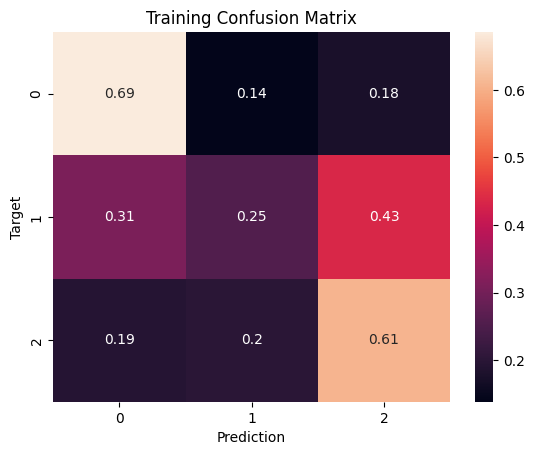

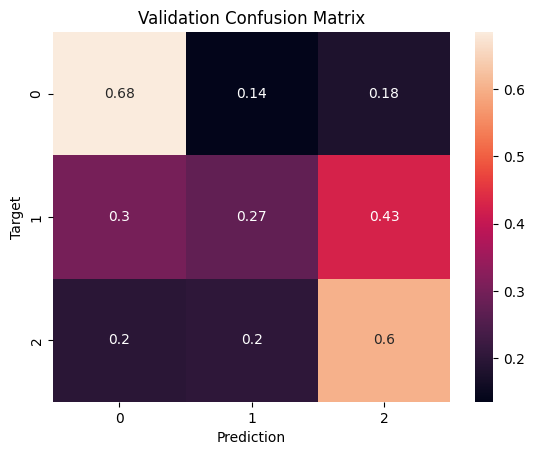

In [8]:
train_preds = predict_and_plot(log_reg, X_train, Y_train, 'Training')
val_preds = predict_and_plot(log_reg, X_test, Y_test, 'Validation')

In [9]:
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63     59192
           1       0.43      0.25      0.32     59192
           2       0.50      0.61      0.55     59192

    accuracy                           0.52    177576
   macro avg       0.50      0.52      0.50    177576
weighted avg       0.50      0.52      0.50    177576



In [18]:
print(classification_report(Y_test, val_preds))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79     64125
           1       0.03      0.27      0.06      1399
           2       0.34      0.60      0.44     10580

    accuracy                           0.67     76104
   macro avg       0.44      0.52      0.43     76104
weighted avg       0.85      0.67      0.73     76104



In [10]:
# random forest
rf = RandomForestClassifier(n_estimators=150, criterion="entropy", max_depth=6, random_state=12)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=150,
                       random_state=12)

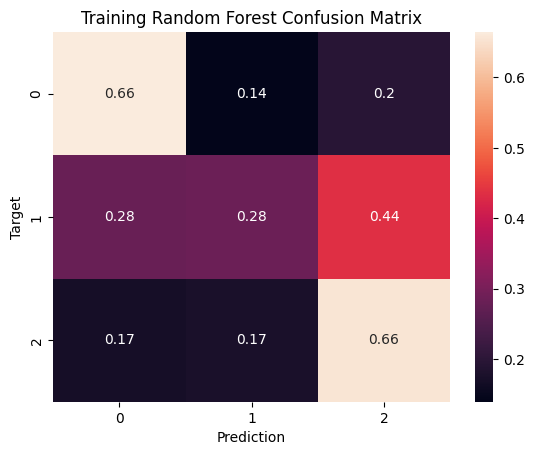

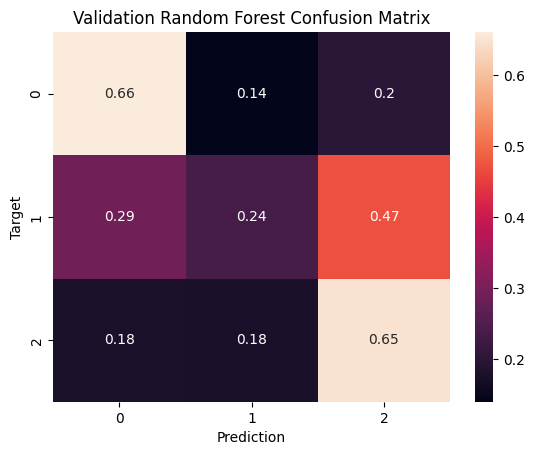

In [11]:
train_preds_rf = predict_and_plot(rf, X_train, Y_train, 'Training Random Forest')
val_preds_rf = predict_and_plot(rf, X_test, Y_test, 'Validation Random Forest')

In [12]:
print(classification_report(Y_train, train_preds_rf))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63     59192
           1       0.47      0.28      0.36     59192
           2       0.51      0.66      0.57     59192

    accuracy                           0.53    177576
   macro avg       0.53      0.53      0.52    177576
weighted avg       0.53      0.53      0.52    177576



In [41]:
print(classification_report(Y_test, val_preds_rf))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     64125
           1       0.03      0.24      0.05      1399
           2       0.34      0.65      0.44     10580

    accuracy                           0.65     76104
   macro avg       0.44      0.51      0.43     76104
weighted avg       0.85      0.65      0.72     76104



In [13]:
# xgboost
xgb = XGBClassifier(n_estimators=150, max_depth=6, random_state=12)

xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

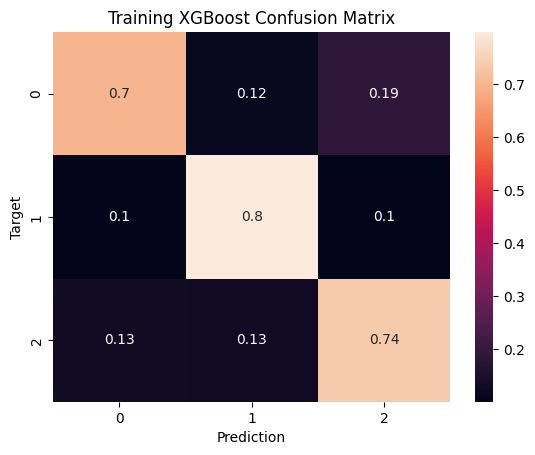

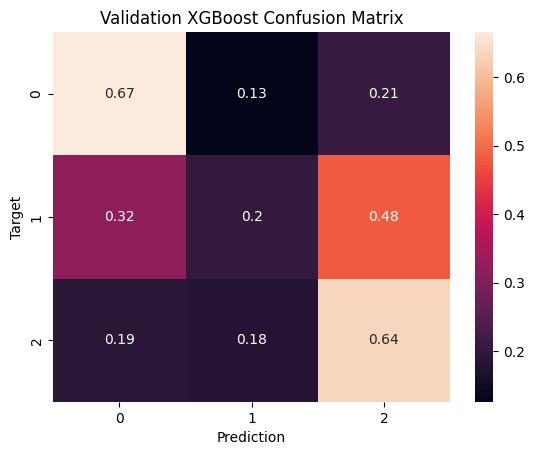

In [14]:
train_preds_xgb = predict_and_plot(xgb, X_train, Y_train, 'Training XGBoost')
val_preds_xgb = predict_and_plot(xgb, X_test, Y_test, 'Validation XGBoost')

In [15]:
print(classification_report(Y_train, train_preds_xgb))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72     59192
           1       0.76      0.80      0.78     59192
           2       0.72      0.74      0.73     59192

    accuracy                           0.74    177576
   macro avg       0.74      0.74      0.74    177576
weighted avg       0.74      0.74      0.74    177576



In [45]:
print(classification_report(Y_test, val_preds_xgb))

              precision    recall  f1-score   support

           0       0.95      0.67      0.78     64125
           1       0.03      0.20      0.05      1399
           2       0.32      0.64      0.43     10580

    accuracy                           0.65     76104
   macro avg       0.43      0.50      0.42     76104
weighted avg       0.84      0.65      0.72     76104

